# Smooth bathymetry  -grab from Susan's notebook

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

In [2]:
Fraser = nc.Dataset('bathy_meter_SalishSea3.nc','r')
bathy = Fraser.variables['Bathymetry'][:]
print bathy.shape

(898, 398)


In [3]:
def find_max(bathy):
    i,j = np.unravel_index(bathy.argmax(), bathy.shape)
    return i,j

In [4]:
def find_slope(bathy,di,dj):
    imax, jmax = bathy.shape
    Da = 0.5*(bathy[di:,dj:]+bathy[0:imax-di,0:jmax-dj])
    Dd = bathy[di:,dj:]-bathy[0:imax-di,0:jmax-dj]
    return Dd/Da

In [5]:
def smooth(gamma,bathy,i,j,di,dj):
    a = 0.5*(bathy[i,j]+bathy[i+di,j+dj])
    if bathy[i,j] < bathy[i+di,j+dj]:
        change = gamma
    else:
        change = -gamma
    bathy[i,j] = bathy[i,j] + gamma*a
    bathy[i+di,j+dj] = bathy[i+di,j+dj] - gamma*a

In [6]:
gamma = 0.2
maxslope = 0.8

slopei = find_slope(bathy,1,0)
i,j = find_max(slopei)
slopej = find_slope(bathy,0,1)
k,l = find_max(slopej)
while np.maximum(slopei[i,j],slopej[k,l]) > maxslope:
    if slopei[i,j] > slopej[k,l]:
        smooth(gamma,bathy,i,j,1,0)
    else:
        smooth(gamma,bathy,k,l,0,1)
    slopei = find_slope(bathy,1,0)
    i,j = find_max(slopei)
    slopej = find_slope(bathy,0,1)
    k,l = find_max(slopej)

print slopei[i,j]
print slopej[i,j]

0.8
--


# Create new t,s file for new bathymetry

In [1]:
from __future__ import division
from salishsea_tools import nc_tools
from salishsea_tools import tidetools
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
%matplotlib inline

In [11]:
#old bathymetry inforamtion
old_path = '../nemo-forcing/grid/bathy_meter_SalishSea2.nc'
old_bathy = nc.Dataset(old_path, 'r')
old_depth = old_bathy.variables['Bathymetry']
print old_depth.shape

(898, 398)


In [3]:
#old initial file
initial_path = '/ocean/dlatorne/MEOPAR/SalishSea/results/spin-up/18oct27oct/SalishSea_03170880_restart.nc'
T_S = nc.Dataset(initial_path, 'r')

In [10]:
nc_tools.show_variables(T_S)
old_T = T_S.variables['tb'][0] # ommit the first dimension
old_S = T_S.variables['sb'][0]
depths = T_S.variables['nav_lev']
lon = T_S.variables['nav_lon']
lat = T_S.variables['nav_lat']
print depths.shape

[u'nav_lon', u'nav_lat', u'nav_lev', u'time_counter', u'kt', u'ndastp', u'adatrj', u'ssh_ibb', u'rnf_b', u'rnf_hc_b', u'rnf_sc_b', u'utau_b', u'vtau_b', u'qns_b', u'emp_b', u'emps_b', u'en', u'avt', u'avm', u'avmu', u'avmv', u'mxln', u'sbc_hc_b', u'sbc_sc_b', u'qsr_hc_b', u'un_b', u'vn_b', u'sshn_b', u'rdt', u'rdttra1', u'ub', u'vb', u'tb', u'sb', u'rotb', u'hdivb', u'sshb', u'fse3t_b', u'un', u'vn', u'tn', u'sn', u'rotn', u'hdivn', u'sshn', u'rhop']
(40,)


[u'nav_lon', u'nav_lat', u'Bathymetry']


<matplotlib.colorbar.Colorbar instance at 0x7f8f1ee549e0>

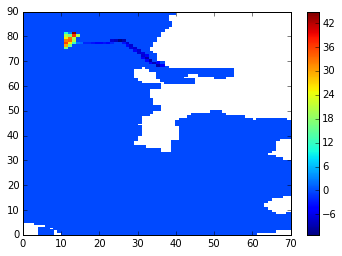

In [5]:
#read in new bathymetry
bathy_path = 'bathy_meter_SalishSea3.nc'
bathy = nc.Dataset(bathy_path, 'r')
new_depth = bathy.variables['Bathymetry']
nc_tools.show_variables(bathy)
plt.pcolormesh(old_depth[350: 440, 280 : 350] -new_depth[350: 440, 280 : 350])
#plt.pcolormesh(old_depth[300: 420, 300 : 350])
plt.colorbar()